## Prediction the Titanic survivors

### Imports

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load datasets

In [4]:
train = pd.read_csv('../datasets/titanic/train.csv')
test = pd.read_csv('../datasets/titanic/test.csv')
print('train: {}, test: {}'.format(train.shape, test.shape))

train: (891, 12), test: (418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Convert Pclass and Survived to objects in the training data

In [10]:
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)
train.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Convert Pclass to object in the test data

In [11]:
test['Pclass'] = test['Pclass'].astype(object)
test.dtypes

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

####  Check whether there are any duplicate entries in your test and training data

In [16]:
# checking for both PassengerId and Name
print(any(train['PassengerId'].duplicated())) 
print(any(test['PassengerId'].duplicated()))
print(any(train['Name'].duplicated())) 
print(any(test['Name'].duplicated())) 

False
False
False
False


#### Summarise survival statistics for your training data

In [133]:
train.groupby(['Survived']).size()

Survived
0    549
1    342
dtype: int64

In [132]:
died = train.groupby(['Survived']).size()[0]
survived = train.groupby(['Survived']).size()[1]
total_passengers = died + survived
print('{} people survived, {} people died'.format(survived, died))

342 people survived, 549 people died


#### Use some simple maths to turn your table into proportions

In [30]:
train['Survived'].value_counts() / total_passengers

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Compare survival rates between the sexes

In [72]:
train.groupby(by=['Sex', 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [33]:
train.groupby(by=['Sex']).size()

Sex
female    314
male      577
dtype: int64

In [74]:
gender_sr_df = train.groupby(by=['Sex', 'Survived'])[['Name']].nunique()
gender_sr_df.rename(columns={'Name': 'Size'}, inplace=True)
gender_sr_df.head()

Size
Sex    Survived      
female 0           81
       1          233
male   0          468
       1          109

In [102]:
female_count=train.groupby(by=['Sex']).size()[0]
male_count=train.groupby(by=['Sex']).size()[1]
survival_rate = gender_sr_df['Size']/[female_count,female_count,male_count,male_count]
survival_rate

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Size, dtype: float64

In [117]:
print('Female passengers have a {:.2f}% change of surviving.'.format(survival_rate[1]*100))
print('Male passengers have a {:.2f}% change of surviving.'.format(survival_rate[3]*100))

Female passengers have a 74.20% change of surviving.
Male passengers have a 18.89% change of surviving.


#### Create a bar plot that compares how many people in your training data survived and died based on Sex

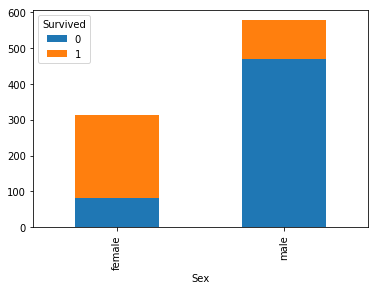

In [119]:
train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

#### Write a clear and unambiguous data question

 Is the gender of a Titanic passenger a good predictor of its change of survival?

#### Formulate two hypotheses, one an independence model and the other an alternative model and express them in words

`Null hypothesis`: Sex and Survived variables are independent and the observed difference between them is due to chance.
<br>`Alternative hypothesis`: Sex and Survived variables are not independent, the observed difference between them is not due to chance and Sex is a good predictor of Survived.

### First model

#### Create a new column in your training data called ModelPrediction with a default value of 0 in each row

In [120]:
train['model_prediction'] = 0
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Calculate the percentage accuracy of your current predictions (where no one survives)

In [136]:
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('First model''s accuracy: {:.2f}%'.format(acc*100))

First models accuracy: 61.62%


#### Assign a value of 1 into the ModelPrediction column of your training data for each female

In [137]:
train.loc[(train.Sex=='female'), 'model_prediction'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [138]:
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('First model''s accuracy: {:.2f}%'.format(acc*100))

First models accuracy: 78.68%


#### Use the groupby method to compare aggregate survival numbers against Pclass

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [143]:
pclass_survived = train.groupby(["Pclass", "Survived"]).size()

In [144]:
pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

#### Compare the proportions of survival between classes

In [176]:
df = train.groupby(["Pclass", "Survived"]).size().reset_index()
df

,Pclass,Survived,0
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [177]:
for pclass in [1,2,3]:
    print('Class {} survival rate: {:.2f}%'.format(pclass, df.loc[(df.Pclass==pclass) & (df.Survived==1), 0].values[0] / df.loc[(df.Pclass==pclass), 0].sum() * 100))

Class 1 survival rate: 62.96%
Class 2 survival rate: 47.28%
Class 3 survival rate: 24.24%


#### Use matplotlib to plot those proportions on a bar graph

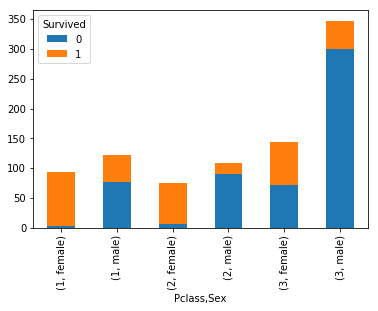

In [179]:
train.groupby(['Pclass', 'Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

### Second model

#### Reset your ModelPrediction column in your training dataset to 0 for each entry

In [233]:
train['model_prediction'] = 0
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1


#### Assign all females with a ModelPrediction of 1 (meaning you predict they survived) except for those in third class

In [234]:
train.loc[(train.Sex=='female') & (train.Pclass!=3), 'model_prediction'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1


#### Recalculate your accuracy percentage

In [235]:
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('Second model''s accuracy: {:.2f}%'.format(acc*100))

Second models accuracy: 78.68%


#### Compare your second model's accuracy percentage to your first model's accuracy percentage

That model change did not make much of a difference!

#### Extend the model to consider male children's survival rate

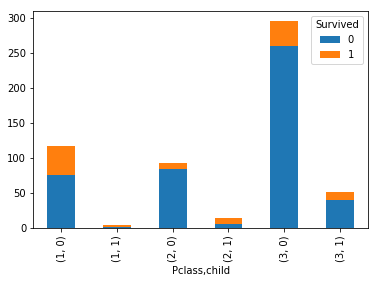

In [236]:
train['child'] = 0
train.loc[train.Age<=18, 'child'] = 1
train.loc[train.Sex=='male'].groupby(['Pclass', 'child', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [237]:
train.loc[(train.Sex=='male') & (train.child==1) & ((train.Pclass==1) | (train.Pclass==2)), 'model_prediction'] = 1
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1,Master,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1,Mrs,2


In [238]:
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('Second model''s accuracy: {:.2f}%'.format(acc*100))

Second models accuracy: 79.35%


#### Challenge yourself - improve the model as far as you can. What other factors might be relevant?

##### Check "title" as a predictor

In [239]:
train['title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1


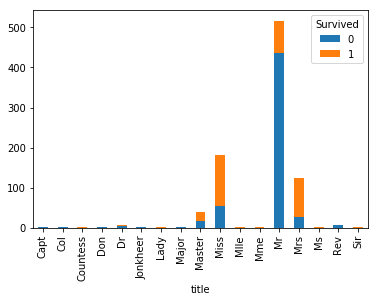

In [240]:
train.groupby(['title', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [241]:
train_df = train.copy()
train_df['Survived'] = train_df['Survived'].astype(np.int64)
train_df[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [242]:
train.loc[(train.title.isin(['Sir', 'Countess', 'Ms', 'Mme', 'Lady', 'Mlle'])) & (train.Pclass!=3), 'model_prediction'] = 1
train.loc[(train.title.isin(['Rev', 'Capt', 'Don', 'Jonkheer'])), 'model_prediction'] = 0
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1


In [243]:
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('Second model''s accuracy: {:.2f}%'.format(acc*100))

Second models accuracy: 79.46%


In [244]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


##### Check family size as a predictor

In [245]:
train_df['family_size'] = train['SibSp'] + train['Parch'] + 1
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1,1


In [246]:
train_df[['family_size', 'Survived']].groupby(['family_size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [247]:
train.loc[((train.SibSp + train.Parch + 1) == 4), 'model_prediction'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,1


In [248]:
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('Second model''s accuracy: {:.2f}%'.format(acc*100))

Second models accuracy: 79.57%


In [249]:
train2 = train.copy()

In [252]:
train = train2.copy()

In [253]:
train.loc[((train.SibSp + train.Parch + 1) >= 8), 'model_prediction'] = 0
acc = sum(train.model_prediction == train.Survived)/train.shape[0]
print('Second model''s accuracy: {:.2f}%'.format(acc*100))

Second models accuracy: 79.57%


### Validate our last model against test dataset

In [254]:
test['model_prediction'] = 0
test.loc[(train.Sex=='female') & (train.Pclass!=3), 'model_prediction'] = 1
test['child'] = 0
test.loc[train.Age<=18, 'child'] = 1
test.loc[(train.Sex=='male') & (train.child==1) & ((train.Pclass==1) | (train.Pclass==2)), 'model_prediction'] = 1
test['title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test.loc[(train.title.isin(['Sir', 'Countess', 'Ms', 'Mme', 'Lady', 'Mlle'])) & (train.Pclass!=3), 'model_prediction'] = 1
test.loc[(train.title.isin(['Rev', 'Capt', 'Don', 'Jonkheer'])), 'model_prediction'] = 0
test.loc[((train.SibSp + train.Parch + 1) == 4), 'model_prediction'] = 1
test.loc[((train.SibSp + train.Parch + 1) >= 8), 'model_prediction'] = 0

In [255]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,model_prediction,child,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,Miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,Mr


#### Prepare submission file

In [260]:
predictions = test[['PassengerId', 'model_prediction']].rename(columns={'model_prediction': 'Survived'}).set_index('PassengerId')
predictions.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,1
896,0


In [261]:
predictions.to_csv('ThomasLanglois_SG_TitanicSubmission.csv')